In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 

In [2]:
#Reading the Dataset
cs_df = pd.read_csv("311_Service_Requests_from_2010_to_Present.csv")

C:\Users\ssjs1\AppData\Local\Temp\ipykernel_25512\3970510245.py:2: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  cs_df = pd.read_csv("311_Service_Requests_from_2010_to_Present.csv")


In [3]:
#viewing top 5 elements 
cs_df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [4]:
cs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      364558 non-null  int64  
 1   Created Date                    364558 non-null  object 
 2   Closed Date                     362177 non-null  object 
 3   Agency                          364558 non-null  object 
 4   Agency Name                     364558 non-null  object 
 5   Complaint Type                  364558 non-null  object 
 6   Descriptor                      358057 non-null  object 
 7   Location Type                   364425 non-null  object 
 8   Incident Zip                    361560 non-null  float64
 9   Incident Address                312859 non-null  object 
 10  Street Name                     312859 non-null  object 
 11  Cross Street 1                  307370 non-null  object 
 12  Cross Street 2  

# 1.1 Identify the shape of the dataset

In [5]:
#shape of the Dataset
cs_df.shape

(364558, 53)

# 1.2 Identify variables with null values

In [6]:
cs_df.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

# 2.1 Missing Value Treatment 

In [7]:
cs_df.nunique()

Unique Key                        364558
Created Date                      362018
Closed Date                       339837
Agency                                 1
Agency Name                            3
Complaint Type                        24
Descriptor                            45
Location Type                         18
Incident Zip                         201
Incident Address                  126372
Street Name                         7693
Cross Street 1                      6234
Cross Street 2                      6064
Intersection Street 1               4704
Intersection Street 2               4422
Address Type                           5
City                                  53
Landmark                             120
Facility Type                          1
Status                                 4
Due Date                          362015
Resolution Description                18
Resolution Action Updated Date    340833
Community Board                       75
Borough         

In [8]:
#viewing the column
cs_df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [9]:
#copying the file into other file to work 
cs2= cs_df.copy()

# 2.1 Missing Value Treatment 

In [10]:
#Dropping columns with null data 
cs2.drop(['Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2','Landmark','Intersection Street 1', 'Intersection Street 2',
        'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry Direction',
       'Ferry Terminal Name',], axis=1 , inplace= True)

In [11]:
cs2.isna().sum()

Unique Key                           0
Created Date                         0
Closed Date                       2381
Agency                               0
Agency Name                          0
Complaint Type                       0
Descriptor                        6501
Location Type                      133
Incident Zip                      2998
Address Type                      3252
City                              2997
Facility Type                     2389
Status                               0
Due Date                             3
Resolution Description               0
Resolution Action Updated Date    2402
Community Board                      0
Borough                              0
X Coordinate (State Plane)        4030
Y Coordinate (State Plane)        4030
Park Facility Name                   0
Park Borough                         0
Latitude                          4030
Longitude                         4030
Location                          4030
dtype: int64

In [12]:
cs2.shape

(364558, 25)

In [13]:
# choosing the closed cases only to eliminate the null values

cs2 = cs2[cs2['Status'] == 'Closed']

In [14]:
#Checking Null data
cs2.isna().sum()

Unique Key                           0
Created Date                         0
Closed Date                          0
Agency                               0
Agency Name                          0
Complaint Type                       0
Descriptor                        6490
Location Type                       67
Incident Zip                       675
Address Type                       929
City                               674
Facility Type                       17
Status                               0
Due Date                             0
Resolution Description               0
Resolution Action Updated Date       2
Community Board                      0
Borough                              0
X Coordinate (State Plane)        1707
Y Coordinate (State Plane)        1707
Park Facility Name                   0
Park Borough                         0
Latitude                          1707
Longitude                         1707
Location                          1707
dtype: int64

In [15]:
cs2=cs2.dropna()

In [16]:
cs2.isna().sum()

Unique Key                        0
Created Date                      0
Closed Date                       0
Agency                            0
Agency Name                       0
Complaint Type                    0
Descriptor                        0
Location Type                     0
Incident Zip                      0
Address Type                      0
City                              0
Facility Type                     0
Status                            0
Due Date                          0
Resolution Description            0
Resolution Action Updated Date    0
Community Board                   0
Borough                           0
X Coordinate (State Plane)        0
Y Coordinate (State Plane)        0
Park Facility Name                0
Park Borough                      0
Latitude                          0
Longitude                         0
Location                          0
dtype: int64

In [17]:
# since all the cases are of closed cases we can now drop the column Status as every value of its data are same
cs2 = cs2.drop(['Status'], axis = 1)

In [18]:
cs2.shape

(353617, 24)

In [19]:
cs2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353617 entries, 0 to 364557
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      353617 non-null  int64  
 1   Created Date                    353617 non-null  object 
 2   Closed Date                     353617 non-null  object 
 3   Agency                          353617 non-null  object 
 4   Agency Name                     353617 non-null  object 
 5   Complaint Type                  353617 non-null  object 
 6   Descriptor                      353617 non-null  object 
 7   Location Type                   353617 non-null  object 
 8   Incident Zip                    353617 non-null  float64
 9   Address Type                    353617 non-null  object 
 10  City                            353617 non-null  object 
 11  Facility Type                   353617 non-null  object 
 12  Due Date        

# 2.2 Analyze the date column and remove the entries if it has an incorrect timeline

In [20]:
# converting 'Created Date' and 'Closed Date' to datetime datatype
cs2['Created Date']= pd.to_datetime(cs2['Created Date'])
cs2['Closed Date']= pd.to_datetime(cs2['Closed Date'])

In [21]:
cs2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353617 entries, 0 to 364557
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique Key                      353617 non-null  int64         
 1   Created Date                    353617 non-null  datetime64[ns]
 2   Closed Date                     353617 non-null  datetime64[ns]
 3   Agency                          353617 non-null  object        
 4   Agency Name                     353617 non-null  object        
 5   Complaint Type                  353617 non-null  object        
 6   Descriptor                      353617 non-null  object        
 7   Location Type                   353617 non-null  object        
 8   Incident Zip                    353617 non-null  float64       
 9   Address Type                    353617 non-null  object        
 10  City                            353617 non-null  object 

In [22]:
cs2.head(10)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Address Type,...,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,ADDRESS,...,01/01/2016 12:55:15 AM,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,Unspecified,MANHATTAN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ADDRESS,...,01/01/2016 01:26:57 AM,01 QUEENS,QUEENS,1007766.0,221986.0,Unspecified,QUEENS,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,ADDRESS,...,01/01/2016 04:51:03 AM,07 BRONX,BRONX,1015081.0,256380.0,Unspecified,BRONX,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,ADDRESS,...,01/01/2016 07:43:13 AM,10 BRONX,BRONX,1031740.0,243899.0,Unspecified,BRONX,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,ADDRESS,...,01/01/2016 03:24:42 AM,04 QUEENS,QUEENS,1019123.0,206375.0,Unspecified,QUEENS,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
5,32306554,2015-12-31 23:56:30,2016-01-01 01:50:11,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11215.0,ADDRESS,...,01/01/2016 01:50:11 AM,07 BROOKLYN,BROOKLYN,986312.0,180032.0,Unspecified,BROOKLYN,40.660823,-73.992568,"(40.66082272389114, -73.99256786342693)"
6,32306559,2015-12-31 23:55:32,2016-01-01 01:53:54,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,10032.0,ADDRESS,...,01/01/2016 01:53:54 AM,12 MANHATTAN,MANHATTAN,1001578.0,245627.0,Unspecified,MANHATTAN,40.840848,-73.937375,"(40.840847591440415, -73.9373750864581)"
7,32307009,2015-12-31 23:54:05,2016-01-01 01:42:54,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10457.0,ADDRESS,...,01/01/2016 01:42:54 AM,03 BRONX,BRONX,1011117.0,244417.0,Unspecified,BRONX,40.837503,-73.902905,"(40.83750262540012, -73.90290517326568)"
8,32308581,2015-12-31 23:53:58,2016-01-01 08:27:32,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11415.0,ADDRESS,...,01/01/2016 08:27:32 AM,09 QUEENS,QUEENS,1030662.0,196163.0,Unspecified,QUEENS,40.704977,-73.832605,"(40.704977164399935, -73.8326047502584)"
9,32308391,2015-12-31 23:53:58,2016-01-01 01:17:40,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11219.0,ADDRESS,...,01/01/2016 01:17:40 AM,11 BROOKLYN,BROOKLYN,984378.0,166541.0,Unspecified,BROOKLYN,40.623793,-73.999539,"(40.623793065806524, -73.99953890121567)"


# 2.3Draw a frequency plot for city-wise complaints

In [23]:
cs2['City'].value_counts()

BROOKLYN               117215
NEW YORK                72767
BRONX                   48591
STATEN ISLAND           15165
JAMAICA                  8760
ASTORIA                  7908
FLUSHING                 7426
RIDGEWOOD                6347
CORONA                   5344
WOODSIDE                 4297
EAST ELMHURST            3544
OZONE PARK               3422
SOUTH RICHMOND HILL      3414
ELMHURST                 3386
MASPETH                  3096
WOODHAVEN                3085
LONG ISLAND CITY         2999
SOUTH OZONE PARK         2653
FRESH MEADOWS            2437
RICHMOND HILL            2294
MIDDLE VILLAGE           2284
QUEENS VILLAGE           2220
JACKSON HEIGHTS          2087
FOREST HILLS             2084
REGO PARK                1797
BAYSIDE                  1541
COLLEGE POINT            1540
FAR ROCKAWAY             1379
WHITESTONE               1354
HOLLIS                   1216
HOWARD BEACH             1131
SPRINGFIELD GARDENS      1078
ROSEDALE                 1078
SAINT ALBA

Text(0.5, 0, 'Cities')

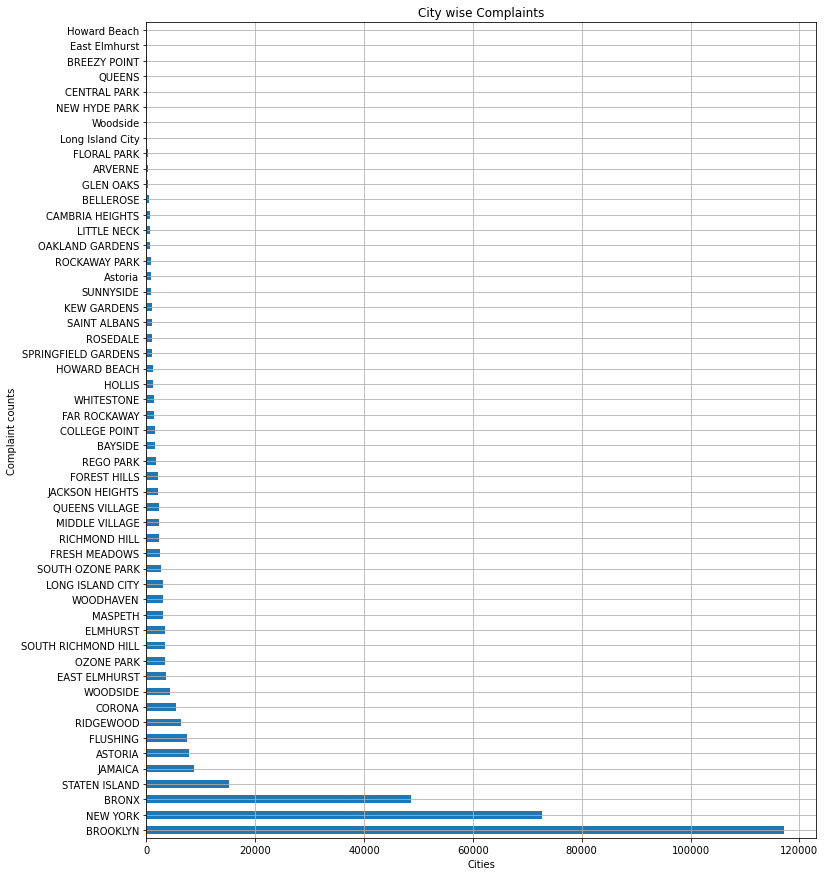

In [24]:
cs2['City'].value_counts().plot(kind='barh', grid = True, figsize=(12,15), title ='City wise Complaints', ylabel='Complaint counts')
plt.xlabel('Cities')

# 2.4 Draw scatter and hexbin plots for complaint concentration across Brooklyn

In [25]:
#Getting Brooklyn Data
Brooklyn = cs2[cs2['City']== 'BROOKLYN']
Brooklyn

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Address Type,...,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,Latitude,Longitude,Location
5,32306554,2015-12-31 23:56:30,2016-01-01 01:50:11,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11215.0,ADDRESS,...,01/01/2016 01:50:11 AM,07 BROOKLYN,BROOKLYN,986312.0,180032.0,Unspecified,BROOKLYN,40.660823,-73.992568,"(40.66082272389114, -73.99256786342693)"
9,32308391,2015-12-31 23:53:58,2016-01-01 01:17:40,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11219.0,ADDRESS,...,01/01/2016 01:17:40 AM,11 BROOKLYN,BROOKLYN,984378.0,166541.0,Unspecified,BROOKLYN,40.623793,-73.999539,"(40.623793065806524, -73.99953890121567)"
13,32305074,2015-12-31 23:47:58,2016-01-01 08:18:47,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11208.0,ADDRESS,...,01/01/2016 08:18:47 AM,05 BROOKLYN,BROOKLYN,1019054.0,189780.0,Unspecified,BROOKLYN,40.687511,-73.874505,"(40.68751060232221, -73.87450451131276)"
17,32310273,2015-12-31 23:44:52,2016-01-01 00:36:10,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11217.0,ADDRESS,...,01/01/2016 12:36:10 AM,06 BROOKLYN,BROOKLYN,988846.0,186711.0,Unspecified,BROOKLYN,40.679154,-73.983430,"(40.679154133157326, -73.98342992763081)"
18,32306617,2015-12-31 23:40:59,2016-01-01 02:37:28,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11234.0,ADDRESS,...,01/01/2016 02:37:28 AM,18 BROOKLYN,BROOKLYN,1003628.0,163910.0,Unspecified,BROOKLYN,40.616550,-73.930202,"(40.61655032892211, -73.93020153359745)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364539,29608505,2015-01-01 00:23:55,2015-01-01 02:58:38,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11201.0,ADDRESS,...,01/01/2015 02:58:38 AM,02 BROOKLYN,BROOKLYN,988583.0,191117.0,Unspecified,BROOKLYN,40.691248,-73.984375,"(40.69124772858873, -73.98437529459297)"
364541,29612697,2015-01-01 00:19:22,2015-01-01 02:41:10,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11211.0,ADDRESS,...,01/01/2015 02:41:10 AM,01 BROOKLYN,BROOKLYN,996180.0,199268.0,Unspecified,BROOKLYN,40.713613,-73.956966,"(40.71361332917013, -73.95696623841229)"
364544,29613295,2015-01-01 00:17:48,2015-01-01 03:24:48,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,11217.0,ADDRESS,...,01/01/2015 03:24:48 AM,06 BROOKLYN,BROOKLYN,991249.0,187148.0,Unspecified,BROOKLYN,40.680352,-73.974766,"(40.68035202521423, -73.97476587888686)"
364545,29613456,2015-01-01 00:17:47,2015-01-01 00:51:13,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11237.0,ADDRESS,...,01/01/2015 12:51:13 AM,04 BROOKLYN,BROOKLYN,1010869.0,191545.0,Unspecified,BROOKLYN,40.692384,-73.904011,"(40.692383519190834, -73.90401080101479)"


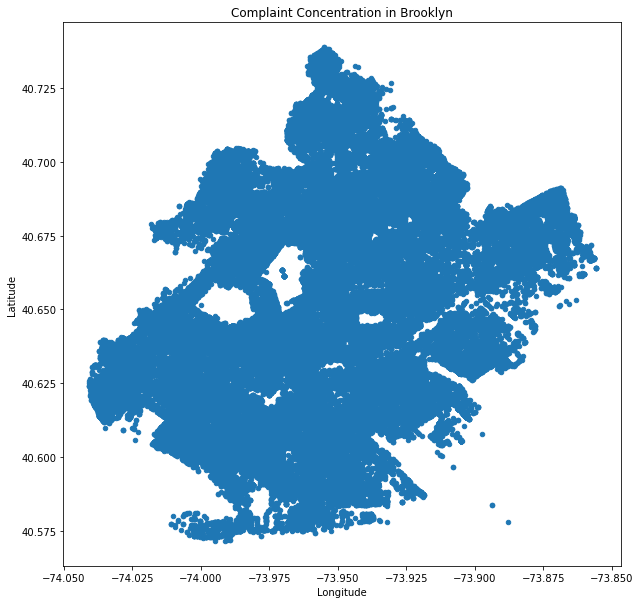

In [26]:
#Scatter plot for complaint concentration across Brooklyn
Brooklyn[['Longitude','Latitude']].plot(kind='scatter', x='Longitude',y='Latitude',figsize=(10,10),title= 'Complaint Concentration in Brooklyn' )
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

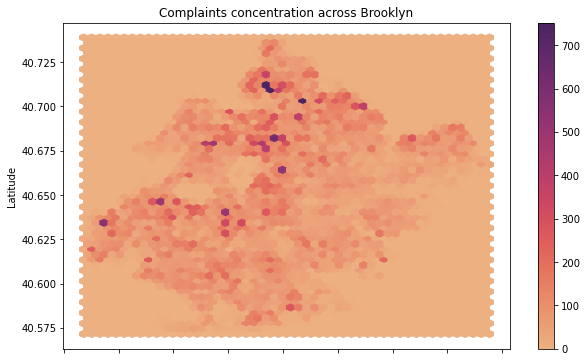

In [27]:
#hexbin plots for complaint concentration across Brooklyn
Brooklyn.plot(kind='hexbin', x='Longitude', y='Latitude', gridsize=50,colormap='flare',
              title = 'Complaints concentration across Brooklyn',
              figsize=(10,6))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# 3.1 Plot a bar graph of count vs. complaint types

Text(0.5, 0, 'Complaint Type')

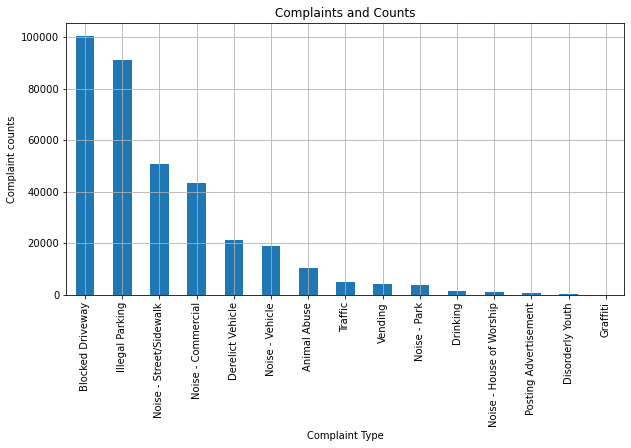

In [28]:
cs2['Complaint Type'].value_counts().head(25).plot(kind='bar', grid = True, figsize=(10,5), title ='Complaints and Counts', ylabel='Complaint counts')
plt.xlabel('Complaint Type')

# 3.2 Find the top 10 types of complaints

In [29]:
cs2['Complaint Type'].value_counts().head(10)

Blocked Driveway           100454
Illegal Parking             91056
Noise - Street/Sidewalk     50788
Noise - Commercial          43623
Derelict Vehicle            21405
Noise - Vehicle             19121
Animal Abuse                10499
Traffic                      4908
Vending                      4162
Noise - Park                 3994
Name: Complaint Type, dtype: int64

# 3.3 Display the types of complaints in each city in a separate dataset

In [30]:
Citywise_Complaints = pd.DataFrame()

In [31]:
for i in cs2['City'].unique():
    Citywise_Complaints[i]= cs2.loc[cs2['City']==i]['Complaint Type'].value_counts()

In [32]:
Citywise_Complaints.head(10)

,NEW YORK,ASTORIA,BRONX,ELMHURST,BROOKLYN,KEW GARDENS,JACKSON HEIGHTS,MIDDLE VILLAGE,REGO PARK,SAINT ALBANS,...,FLORAL PARK,NEW HYDE PARK,CENTRAL PARK,BREEZY POINT,QUEENS,Astoria,Long Island City,Woodside,East Elmhurst,Howard Beach
Noise - Street/Sidewalk,22076,408,9118,228,13943,13.0,238.0,38.0,64.0,81.0,...,3.0,NaN,105.0,1.0,6.0,145.0,28.0,5.0,NaN,NaN
Noise - Commercial,18666,1640,2941,85,13847,203.0,619.0,13.0,82.0,36.0,...,3.0,4.0,NaN,4.0,6.0,310.0,19.0,2.0,NaN,NaN
Illegal Parking,14365,1337,9853,759,33446,276.0,240.0,1104.0,639.0,237.0,...,72.0,32.0,5.0,16.0,10.0,277.0,64.0,124.0,28.0,NaN
Noise - Vehicle,6178,236,3544,69,5932,23.0,75.0,45.0,60.0,50.0,...,2.0,2.0,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN
Blocked Driveway,2686,3436,17048,1992,36414,429.0,703.0,663.0,780.0,318.0,...,33.0,74.0,NaN,3.0,3.0,159.0,55.0,27.0,NaN,1.0
Vending,2619,57,431,25,574,1.0,86.0,NaN,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Animal Abuse,1926,170,1965,59,3185,26.0,50.0,35.0,33.0,43.0,...,7.0,1.0,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN
Traffic,1675,58,379,17,1203,10.0,13.0,14.0,15.0,14.0,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
Noise - Park,1200,64,523,35,1557,NaN,8.0,4.0,22.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Derelict Vehicle,685,426,2396,94,6239,16.0,41.0,366.0,93.0,248.0,...,74.0,14.0,NaN,3.0,2.0,14.0,4.0,8.0,2.0,NaN


# 4. Visualize the major types of complaints in each city

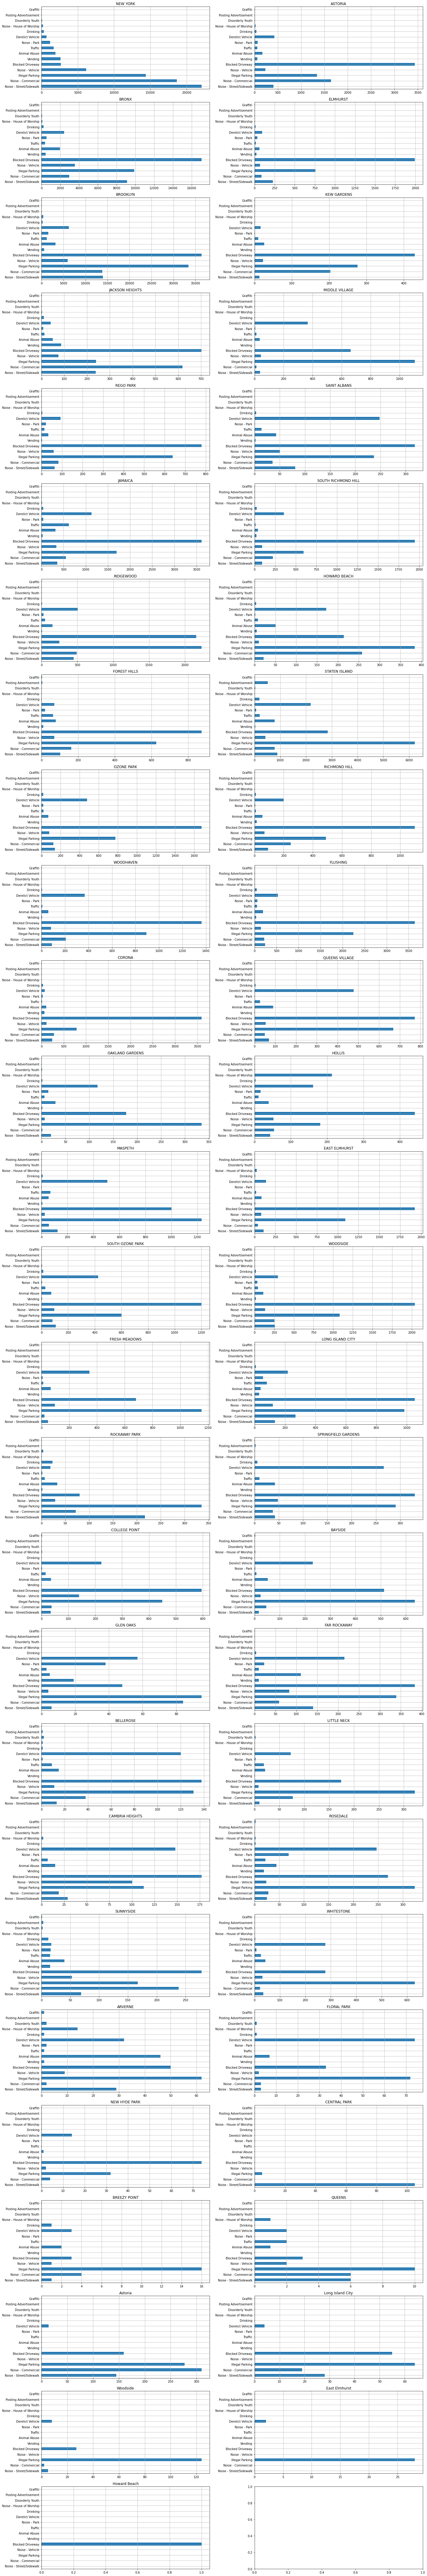

In [33]:
rows= 27
cols= 2
fig, axes =plt.subplots(rows, cols, figsize= (20,120))
for i, (label,col) in enumerate(Citywise_Complaints.iteritems()):
    ax= axes[int(i/cols), i%cols]
    col = col[:15]
    col.plot(kind='barh', ax=ax, grid = True)
    ax.set_title(label)
plt.tight_layout()

# 5. Check if the average response time across various types of complaints

In [34]:
# creating a new column Request_Closing_Time
cs2['Diff']= cs2['Closed Date']-cs2['Created Date']

In [35]:
response_time = cs2.groupby(['City', 'Complaint Type'])['Diff'].mean()
response_time.head(10)

City     Complaint Type          
ARVERNE  Animal Abuse               0 days 02:19:59.195652173
         Blocked Driveway              0 days 02:18:38.840000
         Derelict Vehicle                     0 days 03:09:54
         Disorderly Youth              0 days 03:35:28.500000
         Drinking                             0 days 00:14:19
         Graffiti                             0 days 01:31:48
         Illegal Parking            0 days 02:20:06.080645161
         Noise - Commercial                   0 days 02:17:14
         Noise - House of Worship   0 days 01:50:53.428571428
         Noise - Park                         0 days 01:17:18
Name: Diff, dtype: timedelta64[ns]

In [36]:
response_time.describe()

count                          629
mean     0 days 04:26:13.832182275
std      0 days 03:15:43.049411372
min                0 days 00:14:19
25%         0 days 02:38:57.400000
50%      0 days 03:41:10.973684210
75%      0 days 05:12:27.227390180
max                2 days 05:19:55
Name: Diff, dtype: object